# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



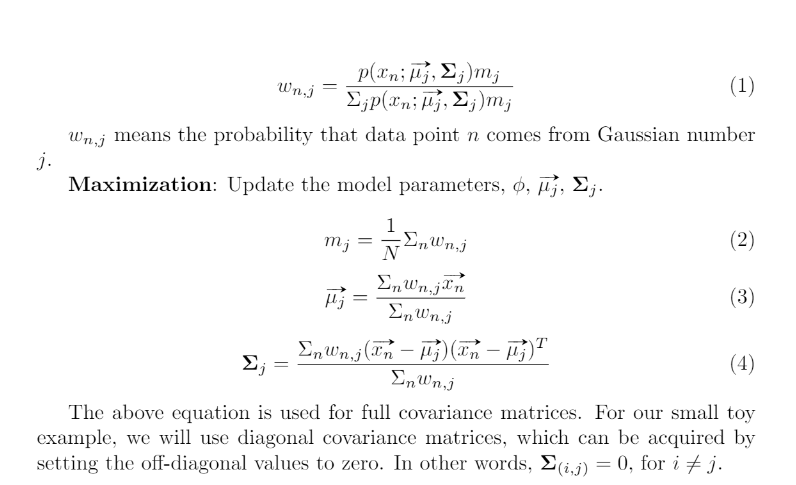

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [150]:
import numpy as np

class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params

        # Initiailize iteration.
        self.n_iter = 0
    def gaussian_distribution_diagonal(cls, xy_vector, mean_j, cov_j, epsilon=1e-10):
        x, y = xy_vector
        sigma_x, sigma_y = np.sqrt(cov_j[0]), np.sqrt(cov_j[1])
        exponent = -0.5 * ((x - mean_j[0]) ** 2 / sigma_x**2 + (y - mean_j[1]) ** 2 / sigma_y**2)
        pdf = (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(exponent)

        # Check if pdf is less than epsilon, then return epsilon
        if pdf < epsilon:
            return epsilon

        return pdf
    def estimation_step(self, data):
        """
        Perform estimation step. Then, return w_{n,j} in eq. 1)
        """
        # Compute responsibilities using current parameters
        # p(x|z=k) * p(z=k)
        num_components = len(self.mixture_weight)
        w = np.zeros((data.shape[0], num_components))

        for j in range(num_components):
            prob_j = np.apply_along_axis(
                lambda dp: self.gaussian_distribution_diagonal(dp, self.mean_params[j], np.diag(self.cov_params[j])),
                axis=1,
                arr=data
            )
            w[:, j] = prob_j * self.mixture_weight[j]

        # Normalize responsibilities
        w = w / np.sum(w, axis=1, keepdims=True)

        return w

    def maximization_step(self, data, w):
        """
        Perform maximization step.
        Update parameters in this GMM model.
        """
        num_data = len(data)
        num_components = len(self.mixture_weight)
        dimension = len(data[0])

        # Update mixture weights
        self.mixture_weight = np.sum(w, axis=0) / num_data

        # Update means
        for k in range(num_components):
            self.mean_params[k] = np.sum(w[:, k][:, np.newaxis] * data, axis=0) / np.sum(w[:, k])

        # Update covariances
        for k in range(num_components):
            diff = data - self.mean_params[k]
            cov_k = np.dot((w[:, k][:, np.newaxis] * diff).T, diff) / np.sum(w[:, k])
            self.cov_params[k] = cov_k


    def multivariate_normal_pdf(self, data, mean, cov):
        """
        Multivariate normal probability density function.
        """
        constant_term = 1 / ((2 * np.pi) ** (len(mean) / 2) * np.linalg.det(cov) ** 0.5)
        exponent_term = np.exp(-0.5 * np.sum(np.dot((data - mean), np.linalg.inv(cov)) * (data - mean), axis=1))
        return constant_term * exponent_term

    def get_log_likelihood(self, data):
        """
        Compute log likelihood.

        Args:
            data (numpy.ndarray): The input data.

        Returns:
            float: Log likelihood of the data given the current GMM parameters.
        """
        log_likelihood = 0

        data_count = data.shape[0]
        mixture_count = len(self.mixture_weight)

        for i in range(data_count):
            likelihood_i = 0
            for j in range(mixture_count):
                prob_ij = self.mixture_weight[j] * self.gaussian_distribution_diagonal(data[i], self.mean_params[j], np.diag(self.cov_params[j]))
                likelihood_i += prob_ij

            log_likelihood += np.log(likelihood_i)

        return log_likelihood

    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):
            # Estimation step
            w = self.estimation_step(data)

            # Maximization step
            self.maximization_step(data, w)

            # Calculate log prob.
            log_prob = self.get_log_likelihood(data)
            log_prob_list.append(log_prob)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_iteration()

        return log_prob_list

In [ ]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1] * num_mixture # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



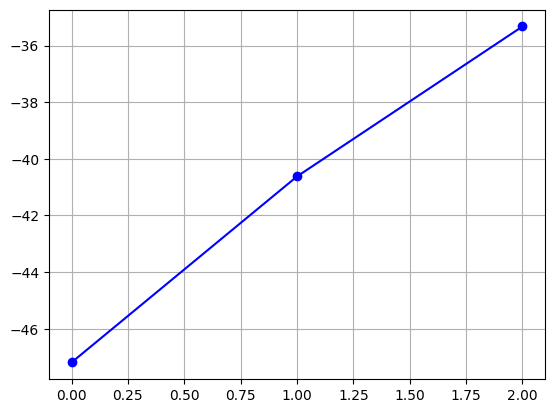

In [153]:
# TODO
plt.plot(np.arange(len(log_prob_list)),log_prob_list,color="blue",marker="o")
plt.grid(True)
plt.show()

    ANS :

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



In [ ]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list2 = gmm2.perform_em_iterations(data, num_iterations)

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

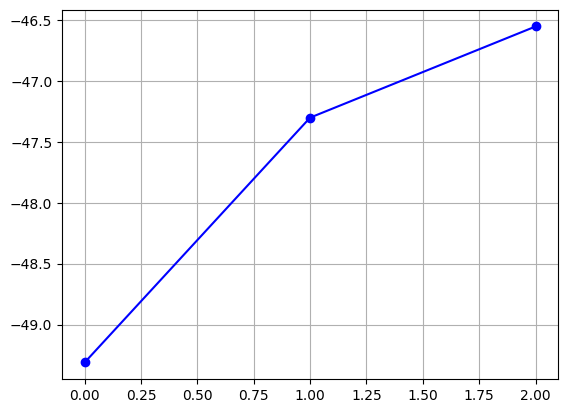

In [155]:
# TODO: Plot log_likelihood from T3
plt.plot(np.arange(len(log_prob_list2)),log_prob_list2,color="blue",marker="o")
plt.grid(True)
plt.show()

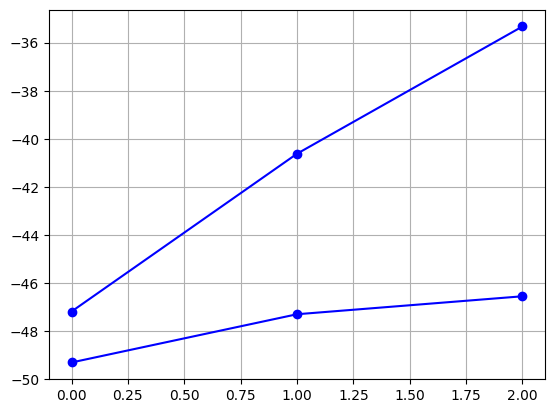

In [156]:
# TODO: Plot log_likelihood from T1 and T3
plt.plot(np.arange(len(log_prob_list)),log_prob_list,color="blue",marker="o")
plt.plot(np.arange(len(log_prob_list2)),log_prob_list2,color="blue",marker="o")
plt.grid(True)
plt.show()

  Remark: บน T1 ล่าง T3

# The face database

In [1]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip facedata_mat.zip

In [157]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

(40, 10)

### Preprocess xf

In [158]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

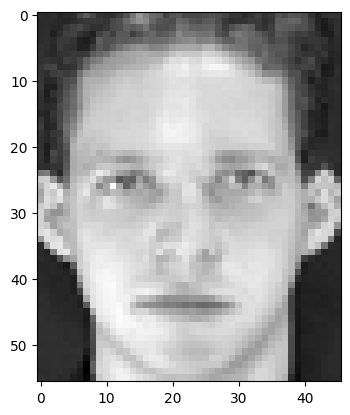

In [159]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [162]:
import math
import numpy as np
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """
    return np.sqrt(np.sum((x2-x1)*(x2-x1)))

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


    ANS : Euclidean distance มีความเหมาะสมต่อข้อมูลแล้ว
    อีกทั้งยังเหมาะต่อการนำไปใช้ทดสอบความเหมือน หรือ แตกต่าง
    ใน face verification ได้

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [163]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    # Get the dimensions of the input matrix
    people_index, image_index, height, width = matrix.shape

    # Reshape the matrix to merge the people and image dimensions
    reshaped_matrix = matrix.reshape(people_index * image_index, height * width)

    return reshaped_matrix


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """

    # INSERT CODE HERE
    similarity_matrix = np.zeros((len(A), len(B)))
    for i in range(len(A)):
        for j in range(len(B)):
            similarity_matrix[i, j] = L2_dist(A[i],B[j])
    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

In [164]:
#TODO: Show similariry matrix between T and D.
people_index, image_index, height, width = xf.shape

# INSERT CODE HERE
T = organize_shape(xf[:,:3])
D = organize_shape(xf[:,3:])
print(T.shape)
print(D.shape)
similarity_matrix = generate_similarity_matrix(T,D)


(120, 2576)
(280, 2576)


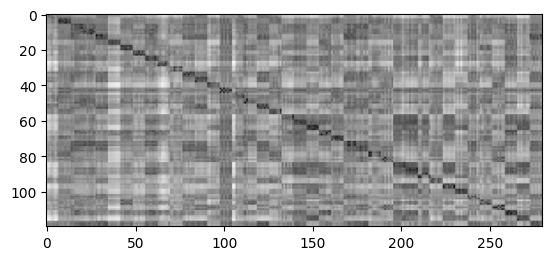

In [165]:
# Example: Ploting face image.
plt.imshow(similarity_matrix, cmap = 'gray')
plt.show()

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


    ANS : For person number 2: Each picture is very similar. (euclidian distance ห่างกันน้อย เป็นสีดำ)
          For person number 1: Each picture is not very similar. (euclidian distance ห่างกันค่อนข้างมาก เป็นสีเทาๆขาวๆ)

> **A simple face verification system**
In our simple face verification system, given a test image, we want to test
if that image comes from person A or not. We will compare the test image
against the three training images from person A we have. If the minimum
distance (between the three training images) is below a threshold, t, we say
that the test image is person A.


### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [166]:
def evaluate_performance(sm, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """

    # INSERT CODE HERE
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(40):
      for j in range(40):
        if(i == j):
          for x in range(7*j, 7*(j+1)):
            y1 = 3*i
            y2 = 3*i + 1
            y3 = 3*i + 2
            min_dis = min(sm[y1,x],sm[y2,x],sm[y3,x])
            if min_dis < threshold:
              tp = tp + 1
            else:
              fn = fn + 1
        else:
          for x in range(7*j, 7*(j+1)):
            y1 = 3*i
            y2 = 3*i + 1
            y3 = 3*i + 2
            min_dis = min(sm[y1,x],sm[y2,x],sm[y3,x])
            if min_dis < threshold:
              fp = fp + 1
            else:
              tn = tn + 1
    true_pos_rate = tp/(tp+fn)
    false_alarm_rate = fp/(fp+tn)
    false_neg_rate = fn/(tp+fn)
    true_neg_rate = tn/(fp+tn)
    return true_pos_rate, false_alarm_rate, false_neg_rate, true_neg_rate
# Quick check
# (true_pos_rate, false_neg_rate) should be (0.9928571428571429, 0.33507326007326005)
evaluate_performance(similarity_matrix, 9.5)

(0.9928571428571429,
 0.33507326007326005,
 0.007142857142857143,
 0.6649267399267399)

In [9]:
# INSERT CODE HERE
evaluate_performance(similarity_matrix, 10)

(0.9964285714285714,
 0.4564102564102564,
 0.0035714285714285713,
 0.5435897435897435)

        ANS: 0.9964285714285714 and 0.4564102564102564

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [199]:
import matplotlib.pyplot as plt
def calculate_roc(input_mat):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_neg_rate from the given matrix.
    """

    # INSERT CODE HERE
    print("min threshold",np.min(input_mat))
    print("max threshold",np.max(input_mat))
    tpr_list = []
    far_list = []
    tnr_list = []
    fnr_list = []
    thresholds = np.linspace(np.min(input_mat), np.max(input_mat), 1000)
    for threshold in thresholds:
      true_pos_rate, false_alarm_rate, false_neg_rate, true_neg_rate = evaluate_performance(input_mat, threshold)
      tpr_list.append(true_pos_rate)
      far_list.append(false_alarm_rate)
      tnr_list.append(true_neg_rate)
      fnr_list.append(false_neg_rate)
    return tpr_list, far_list,tnr_list, fnr_list

def plot_roc(input_mat):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    tpr_list, far_list,tnr_list, fnr_list = calculate_roc(input_mat)

    plt.plot(far_list, tpr_list)
    plt.show()


min threshold 1.7420153428787784
max threshold 17.541726165424688


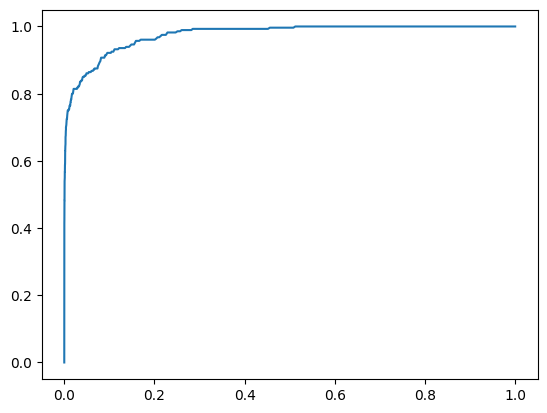

In [200]:
# INSERT CODE HERE
plot_roc(similarity_matrix)

    ANS: min threshold 1.7420153428787784 and max threshold 17.541726165424688

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



In [201]:
# You can add more parameter(s) to the function in the previous question.

tpr_list, far_list,tnr_list, fnr_list = calculate_roc(similarity_matrix)
far_list = np.array(far_list)
fnr_list = np.array(fnr_list)
tpr_list = np.array(tpr_list)

print("EER",tpr_list[np.argmin(np.abs(far_list - fnr_list))])
print("Recall rate at 0.1% false alarm rate",tpr_list[np.argmin(np.abs(far_list - (0.01/100)))])
# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.3428571428571428.
# In other word, Recall is TPR

min threshold 1.7420153428787784
max threshold 17.541726165424688
EER 0.9071428571428571
Recall rate at 0.1% false alarm rate 0.34285714285714286


  ANS: EER is the point at which the false acceptance rate (FAR)
  and false rejection rate (FRR) are equal. **In other words,
  it is the threshold at which the system is equally likely to wrongly
  accept a non-matching individual as it is to wrongly reject a matching individual (false positive rate == false negative rate).**

> **Principle Component Analysis (PCA)**
PCA is a method for dimensionality reduction that is very flexible and fits
many use cases. It is unsupervised (needs no class label). The core of PCA is
using eigendecomposition to decompose the data into the directions of maximum
variance.
Let’s define a matrix X with each column as an input sample #»xi
A typical PCA starts by normalizing each feature dimension so that they
have equal range. For our case, since our input vectors are already between 0
and 1, we can skip this step.
The first step of PCA is to first remove the global mean from our data. Let
# »µx be the means of the input data along each input dimension. Let Xˆ be the
matrix with the mean of the input samples removed. Be sure to use the mean
computed from just the training examples.

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

(2576,)


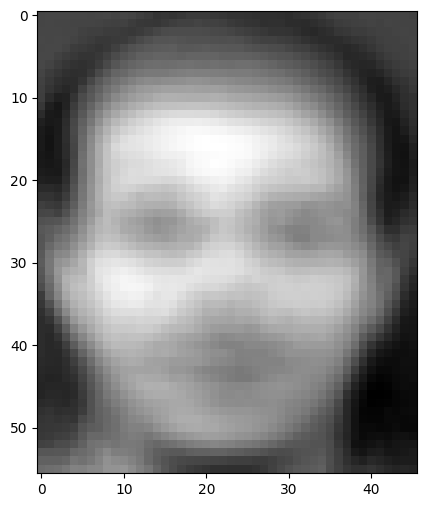

In [202]:
# INSERT CODE HERE
meanface = np.mean(T.reshape(120,-1),axis=0)
print(meanface.shape)
plt.figure(figsize=(8, 6))
plt.imshow(meanface.reshape(56,46),cmap="gray")
plt.show()

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [203]:
x = (T - meanface).T
cov = np.cov(x)

print("Size :",cov.shape)
print("Rank :",np.linalg.matrix_rank(cov))

Size : (2576, 2576)
Rank : 119


> The trick we learned in class is to compute the Gram Matrix (Xˆ T Xˆ), which
is the inner product between the input matrices.

### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [204]:
# TODO: Compute gram matrix.
gram_matrix = np.matmul(x.T , x)
print("gram_size :",gram_matrix.shape)
print("gram_rank :",np.linalg.matrix_rank(gram_matrix))
print("non-zero eigenvalues :",(np.linalg.eigvals(gram_matrix)>0).sum())

gram_size : (120, 120)
gram_rank : 119
non-zero eigenvalues : 120


## T14. Is the Gram matrix also symmetric? Why?


    ANS: Yes, the Gram matrix is indeed symmetric. This symmetry arises
    from the fact that the dot product (inner product) of two vectors a⋅b=b⋅a. and X⋅Xt = Xt⋅X

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [ ]:
import numpy as np
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    return eigenvalues.real, eigenvectors.real

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)
print(eigenvalues.shape)
print(eigenvectors.shape)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

In [206]:
print("non-zero eigenvalues :",eigenvalues.shape[0])

non-zero eigenvalues : 120


### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

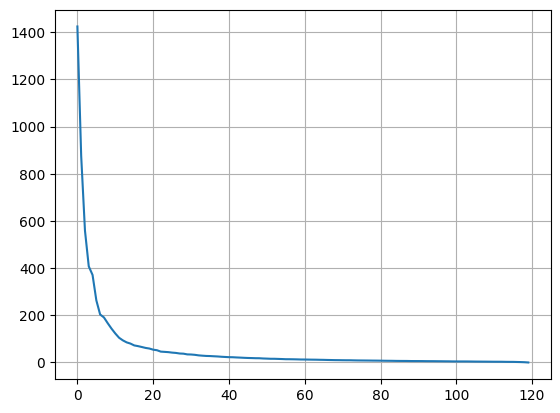

In [207]:
# INSERT CODE HERE
plt.plot(np.arange(len(eigenvalues)),eigenvalues)
plt.grid(True)
plt.show()

    ANS:

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [208]:
# TODO: Compute v, then renormalize it.
# INSERT CODE HERE
v = np.matmul(x, eigenvectors)
v = v / np.linalg.norm(v, axis=0)

In [209]:

def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

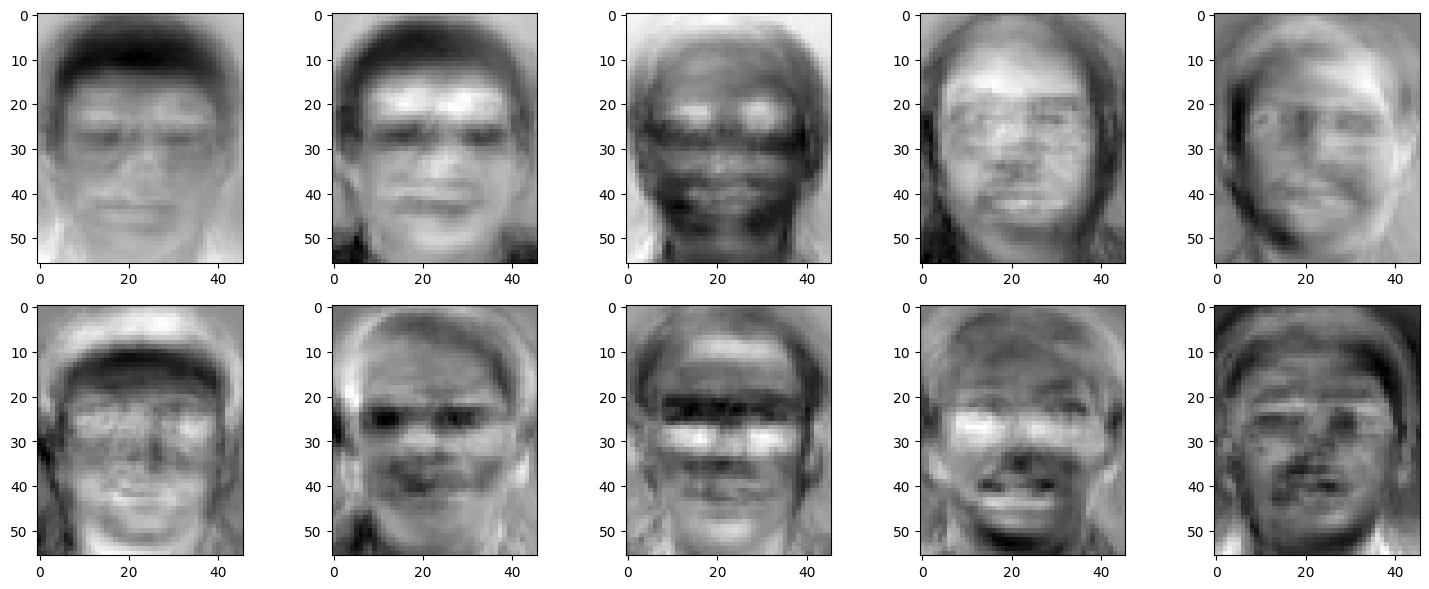

In [210]:

# TODO: Show the first 10 eigenvectors as images.
x = np.linspace(0, 10, 100)
y_data = [np.sin(x + i) for i in range(10)]  # Generate 10 different y datasets

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

# Flatten the axis array for easier indexing
axs = axs.flatten()

# Plot each subplot
for i, ax in enumerate(axs):

    ax.imshow(v.T[i,:].reshape(56,46),cmap="gray_r")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

    ANS: ภาพแรกมีความแตกต่างจากต้นฉบับอย่างมากบริเวณแสงเงารอบข้าง
    ในภาพที่สองมีความแตกต่างจากต้นฉบับบริเวณแสงเงาบนใบหน้า
    รองลงมาจากภาพแรก
    From the original images, The biggiest variance are not capture
    in these two eigenvectors. For reason, please see third eigenvector.
    ในภาพที่สามมีความแตกต่างจากต้นฉบับบริเวณทรงผม สังเกตจากสีของศีรษะ

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [211]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """
    # INSERT CODE HERE
    projection_vectors = np.matmul(v.T, (matrix-meanface).T)
    return projection_vectors.T
    ## it's important to transpost projection_vectors

In [212]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 10
T_reduced = calculate_projection_vectors(T, meanface, v)[:,:k]
D_reduced = calculate_projection_vectors(D, meanface, v)[:,:k]

def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

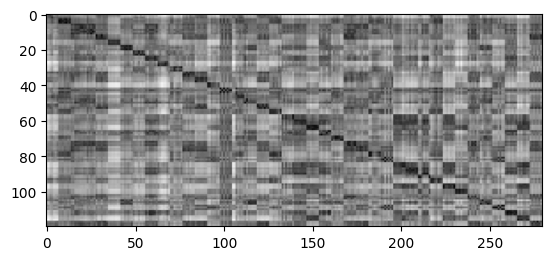

min threshold 0.2803389280466327
max threshold 15.820383628019478


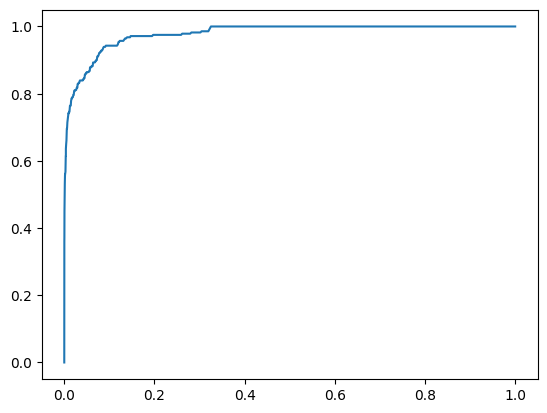

In [213]:
# TODO: Get similarity matrix of T_reduced and D_reduced
similarity_matrix_reduced = generate_similarity_matrix(T_reduced, D_reduced)
plt.imshow(similarity_matrix_reduced, cmap = 'gray')
plt.show()
plot_roc(similarity_matrix_reduced)

In [214]:
# TODO: Find EER and the recall rate at 0.1% FAR.
tpr_list, far_list,tnr_list, fnr_list = calculate_roc(similarity_matrix_reduced)
far_list = np.array(far_list)
fnr_list = np.array(fnr_list)
tpr_list = np.array(tpr_list)

print("EER",tpr_list[np.argmin(np.abs(far_list - fnr_list))])
print("Recall rate at 0.1% false alarm rate",tpr_list[np.argmin(np.abs(far_list - (0.01/100)))])

min threshold 0.2803389280466327
max threshold 15.820383628019478
EER 0.9214285714285714
Recall rate at 0.1% false alarm rate 0.33214285714285713


### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


In [215]:
# INSERT CODE HERE
for k in range(5,15):
  T_reduced2 = calculate_projection_vectors(T, meanface, v)[:,:k]
  D_reduced2 = calculate_projection_vectors(D, meanface, v)[:,:k]
  similarity_matrix_reduced2 = generate_similarity_matrix(T_reduced2, D_reduced2)
  tpr_list, far_list,tnr_list, fnr_list = calculate_roc(similarity_matrix_reduced2)
  far_list = np.array(far_list)
  fnr_list = np.array(fnr_list)
  tpr_list = np.array(tpr_list)
  print("k :",k)
  print("EER",tpr_list[np.argmin(np.abs(far_list - fnr_list))])
  print("Recall rate at 0.1% false alarm rate",tpr_list[np.argmin(np.abs(far_list - (0.01/100)))])
  print("-------------------------------------------------")

min threshold 0.18946561871747022
max threshold 15.665136502000625
k : 5
EER 0.8928571428571429
Recall rate at 0.1% false alarm rate 0.05714285714285714
-------------------------------------------------
min threshold 0.20304717361245
max threshold 15.736685198553852
k : 6
EER 0.9071428571428571
Recall rate at 0.1% false alarm rate 0.06785714285714285
-------------------------------------------------
min threshold 0.21469650763319217
max threshold 15.7594835378038
k : 7
EER 0.9071428571428571
Recall rate at 0.1% false alarm rate 0.26785714285714285
-------------------------------------------------
min threshold 0.263018235387369
max threshold 15.761623825782102
k : 8
EER 0.9142857142857143
Recall rate at 0.1% false alarm rate 0.33214285714285713
-------------------------------------------------
min threshold 0.27984497936454356
max threshold 15.761648850012607
k : 9
EER 0.9178571428571428
Recall rate at 0.1% false alarm rate 0.32142857142857145
------------------------------------------

    ANS: k : 10-11 with EER 0.9214285714285714 But 10 is better because is has lower dimensions.

### OT2. Reconstruct the first image using this procedure. Use k = 10, what is the MSE?

In [186]:
def MSE(x, xd):
  return np.mean((x - xd)**2)

(10,)


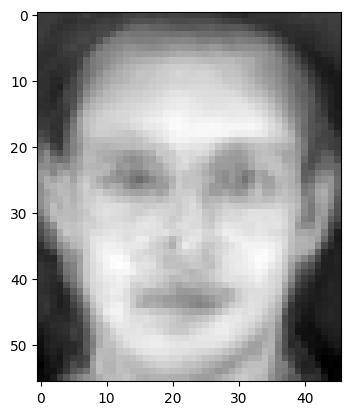

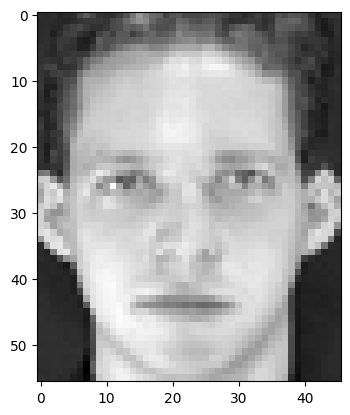

MSE :  0.006148335016488304


In [187]:
T_reduced = calculate_projection_vectors(T, meanface, v)[:,:10][0]
print(T_reduced.shape)
re_pic=(np.matmul(v[:,:10],T_reduced.T)) + meanface
plt.imshow(re_pic.reshape(56,46),cmap="gray")
plt.show()
plt.imshow(xf[0,0],cmap="gray")
plt.show()

print("MSE : ",MSE(re_pic.reshape(56,46),xf[0,0]))

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS: From
    N=120 (datasets)
    C=40 (count of Classes or count of peoples)
    Thus, full rank of Sw is n_dim = N - C = 20 - 40 = 80

In [216]:
# TODO: Define dimension of PCA.
n_dim = 120 - 40

# TODO: Find PCA of T and D with n_dim dimension.
T_reduced = calculate_projection_vectors(T, meanface, v[:,:n_dim])
D_reduced = calculate_projection_vectors(D, meanface, v[:,:n_dim])


In [217]:
mean_people = np.mean(T_reduced.reshape((-1, 3, T_reduced.shape[1])), axis = 1)

In [218]:
C = 40 # We have 40 peoples or 40 classes
t = 3 # For any class, there have 3 images from list T.
Sw = np.zeros([n_dim,n_dim])
for i in range(C)  :
  for j in range(t) :
    Swi = T_reduced[i * 3 + j] - mean_people[i]
    Sw += np.outer(Swi,Swi)

In [219]:
global_mean = np.mean(T_reduced, axis= 0)
Sb = np.zeros([n_dim,n_dim])
for i in range(C)  :
  Sbi = mean_people[i] - global_mean
  Sb = Sb + np.outer(Sbi,Sbi)
print(Sb.shape)

(80, 80)


### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


> In other words, the LDA projections are the eigenvectors of $S_W^{-1}$ $S_B$

In [220]:
# TODO: Find the LDA projection.
Sw_inverse = np.linalg.inv(Sw)
lda_projections = np.matmul(Sw_inverse,Sb)
print("Is SwSb is symmetric :",(lda_projections == lda_projections.T).all())


Is SwSb is symmetric : False


In [221]:
# TODO: Find how many non-zero eigenvalues there are.
eigenvalues_lda, eigenvectors_lda = calculate_eigenvectors_and_eigenvalues(lda_projections)
print("non-zero eigenvalues :",eigenvalues_lda.shape[0])

non-zero eigenvalues : 80


    ANS: There cannot use numpy.linalg.eigh because lda_projections is not symmetric.
    Therefore, there should use numpy.linalg.eig instead.

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

(2576, 80)


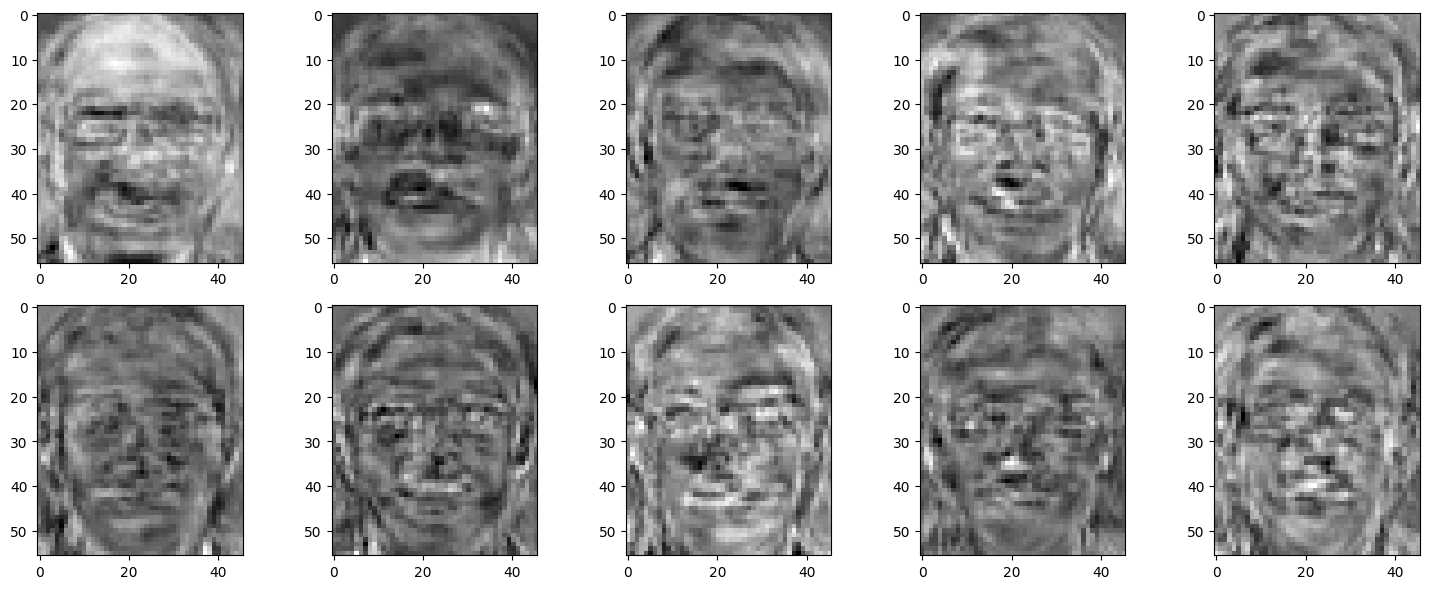

In [222]:
# INSERT CODE HERE

# TODO: Show the first 10 eigenvectors as images.

# v is eigenface
# let ev is lda eigenvector in original image space
ev = np.matmul(v[:, :n_dim],eigenvectors_lda)

x = np.linspace(0, 10, 100)
y_data = [np.sin(x + i) for i in range(10)]  # Generate 10 different y datasets

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

# Flatten the axis array for easier indexing
axs = axs.flatten()
print(ev.shape)
# Plot each subplot
for i, ax in enumerate(axs):
    ax.imshow(ev[:,i].reshape(56,46),cmap="gray_r")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

min threshold 0.626467842598215
max threshold 11.613769593282605
EER 0.8785714285714286
Recall rate at 0.1% false alarm rate 0.29285714285714287


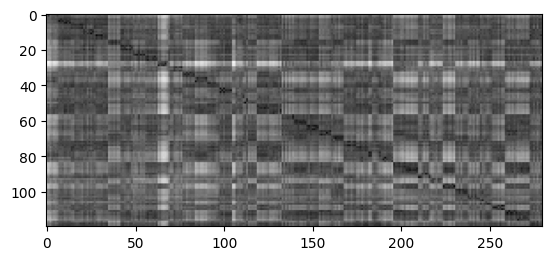

In [227]:
# INSERT CODE HERE
T_fisherfaces = calculate_projection_vectors(T_reduced, global_mean, eigenvectors_lda[:,:39])
D_fisherfaces = calculate_projection_vectors(D_reduced, global_mean, eigenvectors_lda[:,:39])

fisherfaces_similary_matrix = generate_similarity_matrix(T_fisherfaces, D_fisherfaces)
tpr_list, far_list,tnr_list, fnr_list = calculate_roc(fisherfaces_similary_matrix)
far_list = np.array(far_list)
fnr_list = np.array(fnr_list)
tpr_list = np.array(tpr_list)
print("EER",tpr_list[np.argmin(np.abs(far_list - fnr_list))])
print("Recall rate at 0.1% false alarm rate",tpr_list[np.argmin(np.abs(far_list - (0.01/100)))])
plt.imshow(fisherfaces_similary_matrix, cmap ="gray")
plt.show()

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

In [224]:
# INSERT CODE HERE
def plot_rocs(matrixs):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    i = 0
    # INSERT CODE HERE
    for input_mat in matrixs:
      tpr_list, far_list,tnr_list, fnr_list = calculate_roc(input_mat)
      plt.plot(far_list, tpr_list)
    name = ["no optimization", "w/ PCA", "Fisherface"]
    plt.legend(name)
    plt.show()


min threshold 1.7420153428787784
max threshold 17.541726165424688
min threshold 0.2803389280466327
max threshold 15.820383628019478
min threshold 0.626467842598215
max threshold 11.613769593282605


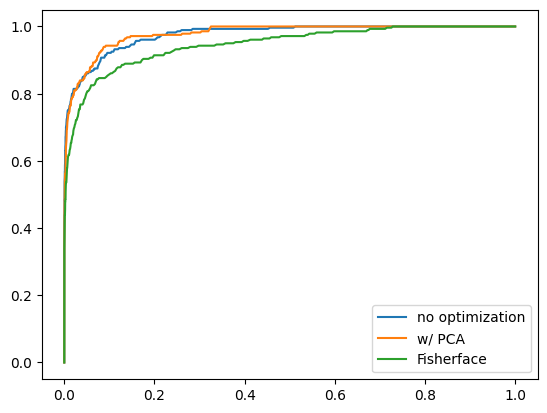

In [228]:
plot_rocs([similarity_matrix,similarity_matrix_reduced,fisherfaces_similary_matrix])

    ANS: